<div style="text-align:center; background-color:#f0f8ff; padding:30px; border-radius:15px">

<h1>🚗 Car Price Analytics</h1>
<h2>Hypothesis 04: Drive Wheel Type vs Car Price</h2>

</div>

**Hypothesis:**  
Front-wheel drive (FWD) cars are generally cheaper than rear-wheel drive (RWD) cars.


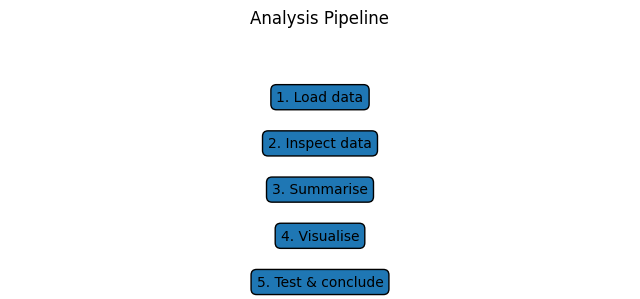

In [2]:
import matplotlib.pyplot as plt

steps = [
    "1. Load data",
    "2. Inspect data",
    "3. Summarise",
    "4. Visualise",
    "5. Test & conclude"
]

fig, ax = plt.subplots(figsize=(8, 3))

# Hide axes
ax.axis('off')

# Draw text boxes vertically
y_positions = [0.8, 0.6, 0.4, 0.2, 0.0]

for step, y in zip(steps, y_positions):
    ax.text(0.5, y, step,
            ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.4", edgecolor='black'))

plt.title("Analysis Pipeline", pad=20)
plt.show()


In [1]:
# Step 1: Import libraries and load the dataset
# --------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind  # for comparing two groups (FWD vs RWD

In [2]:
import os
os.listdir('../data/final')

['car_prices.csv']

In [3]:

# Load the cleaned dataset (path from notebooks folder)
df = pd.read_csv('../data/final/car_prices.csv')

print(" Dataset loaded successfully!")
print(df.shape)
df.head()

 Dataset loaded successfully!
(205, 31)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,highwaympg,price,manufacturer,model,compressionratio_bin,price_per_hp,power_to_weight_ratio,engine_efficiency,avg_mpg,price_per_mpg
0,3,petrol,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,27,13495.0,alfa-romero,giulia,Low,121.576577,0.043564,0.853846,24.0,562.291667
1,3,petrol,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,27,16500.0,alfa-romero,stelvio,Low,148.648649,0.043564,0.853846,24.0,687.500000
2,1,petrol,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,...,26,16500.0,alfa-romero,Quadrifoglio,Low,107.142857,0.054552,1.013158,22.5,733.333333
3,2,petrol,std,four,sedan,fwd,99.8,176.6,66.2,54.3,...,30,13950.0,audi,100 ls,Standard,136.764706,0.043646,0.935780,27.0,516.666667
4,2,petrol,std,four,sedan,4wd,99.4,176.6,66.4,54.3,...,22,17450.0,audi,100ls,Low,151.739130,0.040722,0.845588,20.0,872.500000


In [4]:
# --------------------------------------------
# Step 2: Check relevant columns
# --------------------------------------------

# Show all column names to confirm 'drivewheel' and 'price' exist
print("Columns:", df.columns.tolist())

# Show unique values in drivewheel column
print("\nUnique drive types:", df['drivewheel'].unique())

# Quick preview of the two key columns
df[['drivewheel', 'price']].head()


Columns: ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'manufacturer', 'model', 'compressionratio_bin', 'price_per_hp', 'power_to_weight_ratio', 'engine_efficiency', 'avg_mpg', 'price_per_mpg']

Unique drive types: ['rwd' 'fwd' '4wd']


,drivewheel,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0


C:\Users\ABDUL\AppData\Local\Temp\ipykernel_1980\1029543538.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='drivewheel', y='price', data=df, ci=None, palette='pastel')
C:\Users\ABDUL\AppData\Local\Temp\ipykernel_1980\1029543538.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='drivewheel', y='price', data=df, ci=None, palette='pastel')


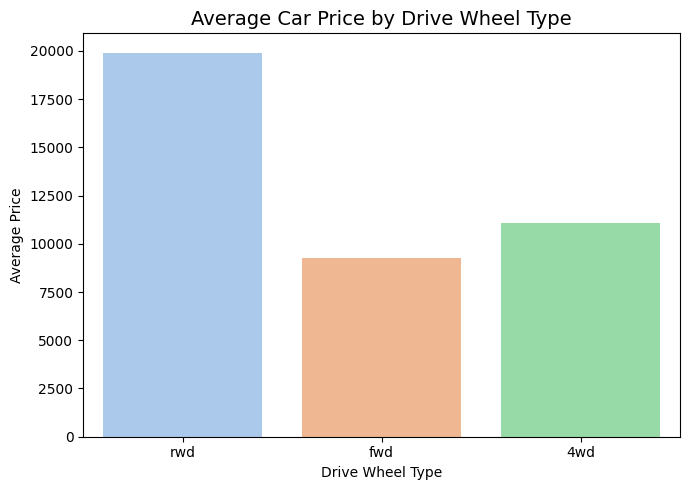

In [7]:
plt.figure(figsize=(7,5))

# Bar plot of average price for each drive type
sns.barplot(x='drivewheel', y='price', data=df, ci=None, palette='pastel')

plt.title('Average Car Price by Drive Wheel Type', fontsize=14)
plt.xlabel('Drive Wheel Type')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


C:\Users\ABDUL\AppData\Local\Temp\ipykernel_1980\3468321310.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='drivewheel', y='price', data=df, palette='Set2')


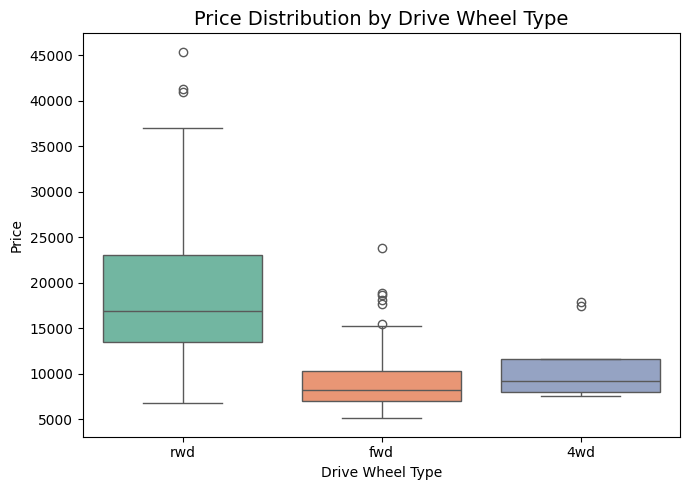

In [5]:


#: Price distribution by drivewheel (boxplot)
# --------------------------------------------

plt.figure(figsize=(7,5))

sns.boxplot(x='drivewheel', y='price', data=df, palette='Set2')

plt.title('Price Distribution by Drive Wheel Type', fontsize=14)
plt.xlabel('Drive Wheel Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [6]:
# Step 5: Statistical test (t-test) - FWD vs RWD

# Filter prices by drive type
fwd_prices = df[df['drivewheel'] == 'fwd']['price']
rwd_prices = df[df['drivewheel'] == 'rwd']['price']

print(f"Number of FWD cars: {len(fwd_prices)}")
print(f"Number of RWD cars: {len(rwd_prices)}")

# Perform independent t-test (Welch's t-test, equal_var=False)
t_stat, p_value = ttest_ind(fwd_prices, rwd_prices, equal_var=False)

print(f"\nT-test statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

# Interpretation based on p-value
if p_value < 0.05:
    print("\n✅ There is a statistically significant difference in price between FWD and RWD cars.")
    print("   → This supports the hypothesis that drivewheel type affects car price.")
else:
    print("\n❌ No statistically significant difference in price between FWD and RWD cars.")
    print("   → The data does not strongly support the hypothesis.")


Number of FWD cars: 120
Number of RWD cars: 76

T-test statistic: -9.798
P-value: 0.0000

✅ There is a statistically significant difference in price between FWD and RWD cars.
   → This supports the hypothesis that drivewheel type affects car price.


###  Hypothesis 04: Drive Wheel Type vs Car Price

**Hypothesis:**  
Front-wheel drive (FWD) cars are cheaper than rear-wheel drive (RWD) cars.

**Findings:**  
- RWD cars have higher average prices than FWD cars.  
- Box plot shows RWD cars have a wider price range and higher values.  
- The t-test (p-value = 0.0000) confirms the difference is statistically significant.

**Conclusion:**  
FWD cars are generally cheaper, supporting the hypothesis that drive wheel type affects car price.
